<a href="https://colab.research.google.com/github/jonathan12932/MNIST-Neural-Network/blob/main/Handwritten_Numbers_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


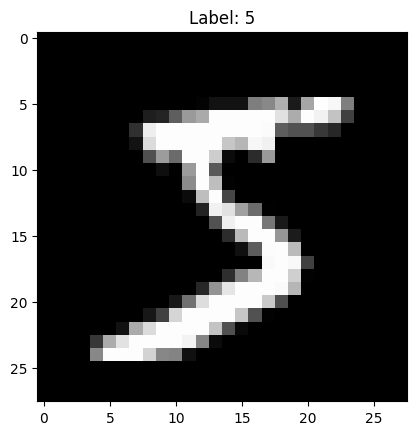

Flattened training data shape: (60000, 784)
Flattened testing data shape: (10000, 784)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.   

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist


# Import training set as image with 28px width and height
# Each pixel has a greyscale value of 0-255
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")

plt.imshow(x_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()

# Normalize greyscale values to range [0, 1] for each pixel in the photo
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten images from 28x28 to a single row of 784px grey scale pixel values and
# each image is a row (matrix stores every picture into a row)
# Each element represents the jth grey scale pixel of the ith picture
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print(f"Flattened training data shape: {x_train.shape}")
print(f"Flattened testing data shape: {x_test.shape}")

# Print first training image vector
print(x_train[0])

# Check its minimum and maximum values
print(f"Min pixel value: {x_train[0].min()}")
print(f"Max pixel value: {x_train[0].max()}")

# Define neural network parameters
input_size = 784
hidden_size = 256
output_size = 10

# New layer sizes
hidden_size_2 = 128
hidden_size_3 = 64

Epoch 1/50, Loss: 0.1542
Epoch 2/50, Loss: 0.1074
Epoch 3/50, Loss: 0.0744
Epoch 4/50, Loss: 0.0434
Epoch 5/50, Loss: 0.0867
Epoch 6/50, Loss: 0.0313
Epoch 7/50, Loss: 0.0148
Epoch 8/50, Loss: 0.0147
Epoch 9/50, Loss: 0.0030
Epoch 10/50, Loss: 0.0155
Epoch 11/50, Loss: 0.0034
Epoch 12/50, Loss: 0.0043
Epoch 13/50, Loss: 0.0047
Epoch 14/50, Loss: 0.0061
Epoch 15/50, Loss: 0.0152
Epoch 16/50, Loss: 0.0057
Epoch 17/50, Loss: 0.0070
Epoch 18/50, Loss: 0.0025
Epoch 19/50, Loss: 0.0014
Epoch 20/50, Loss: 0.0026
Epoch 21/50, Loss: 0.0033
Epoch 22/50, Loss: 0.0023
Epoch 23/50, Loss: 0.0034
Epoch 24/50, Loss: 0.0035
Epoch 25/50, Loss: 0.0040
Epoch 26/50, Loss: 0.0087
Epoch 27/50, Loss: 0.0038
Epoch 28/50, Loss: 0.0018
Epoch 29/50, Loss: 0.0028
Epoch 30/50, Loss: 0.0013
Epoch 31/50, Loss: 0.0011
Epoch 32/50, Loss: 0.0026
Epoch 33/50, Loss: 0.0012
Epoch 34/50, Loss: 0.0014
Epoch 35/50, Loss: 0.0049
Epoch 36/50, Loss: 0.0014
Epoch 37/50, Loss: 0.0555
Epoch 38/50, Loss: 0.0016
Epoch 39/50, Loss: 0.

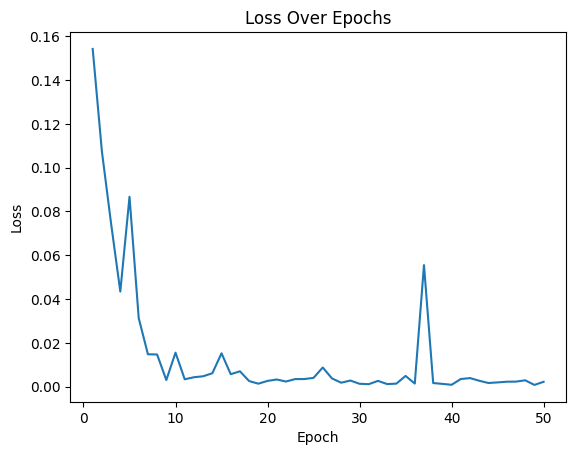

In [ ]:
np.random.seed(42) # Commonly used seed to replicate "randomness" for consistent testing purposes

# Initialize weights and biases
weights_input_hidden = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
weights_hidden_1_to_2 = np.random.randn(hidden_size, hidden_size_2) * np.sqrt(2 / hidden_size)
weights_hidden_2_to_3 = np.random.randn(hidden_size_2, hidden_size_3) * np.sqrt(2 / hidden_size_2)
weights_hidden_3_to_output = np.random.randn(hidden_size_3, output_size) * np.sqrt(2 / hidden_size_3)

biases_hidden = np.zeros((1, hidden_size))
biases_hidden_2 = np.zeros((1, hidden_size_2))
biases_hidden_3 = np.zeros((1, hidden_size_3))
biases_output = np.zeros((1, output_size))

# Define ReLU activation function
def leaky_relu(z):
    return np.where(z > 0, z, 0)

def softmax(z):
    # Subtract the max for numerical stability
    z_stable = z - np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z_stable)
    probabilities = exp_z / np.sum(exp_z, axis=1, keepdims=True)
    return probabilities

# Cross-entropy loss function
def cross_entropy_loss(probabilities, true_labels):
    # Create a one-hot encoded matrix for the true labels
    one_hot_labels = np.eye(output_size)[true_labels]

    # Compute the loss
    # Use a small value (1e-10) to prevent log(0)
    loss = -np.mean(np.sum(one_hot_labels * np.log(probabilities + 1e-10), axis=1))
    return loss

# Training parameters
num_epochs = 50 # Number of times to go through the entire dataset
batch_size = 100 # Number of samples per batch
learning_rate = 0.0001

# Store loss history to monitor training
loss_history = []

# Training loop
for epoch in range(num_epochs):

    if epoch <= 5:
        learning_rate = 0.001
    elif epoch <= 10:
        learning_rate = 0.0007
    elif epoch <= 20:
        learning_rate = 0.0003
    elif epoch <= 30:
        learning_rate = 0.0001
    else:
      learning_rate = 0.00005


    np.random.seed(42 + epoch)
    # Shuffle the dataset at the beginning of each epoch
    permutation = np.random.permutation(x_train.shape[0])
    x_train_shuffled = x_train[permutation]
    y_train_shuffled = y_train[permutation]

    # Loop through batches
    for i in range(0, x_train.shape[0], batch_size):

        # Select batch
        batch_images = x_train_shuffled[i:i + batch_size]
        batch_labels = y_train_shuffled[i:i + batch_size]

        # Forward pass through first hidden layer
        Z_hidden_1 = np.dot(batch_images, weights_input_hidden) + biases_hidden
        A_hidden_1 = leaky_relu(Z_hidden_1)

        # Forward pass through second hidden layer
        Z_hidden_2 = np.dot(A_hidden_1, weights_hidden_1_to_2) + biases_hidden_2
        A_hidden_2 = leaky_relu(Z_hidden_2)

        # Forward pass through third hidden layer
        Z_hidden_3 = np.dot(A_hidden_2, weights_hidden_2_to_3) + biases_hidden_3
        A_hidden_3 = leaky_relu(Z_hidden_3)

        # Forward pass through output layer
        Z_output = np.dot(A_hidden_3, weights_hidden_3_to_output) + biases_output
        probabilities = softmax(Z_output)

        # Compute loss
        loss = cross_entropy_loss(probabilities, batch_labels)

        # Backpropagation
        # Gradients for output layer
        delta_output = probabilities - np.eye(output_size)[batch_labels]
        d_weights_hidden_3_to_output = np.dot(A_hidden_3.T, delta_output)
        d_biases_output = np.sum(delta_output, axis=0, keepdims=True)

        # Gradients for hidden layer 3
        delta_hidden_3 = np.dot(delta_output, weights_hidden_3_to_output.T) * (Z_hidden_3 > 0)
        d_weights_hidden_2_to_3 = np.dot(A_hidden_2.T, delta_hidden_3)
        d_biases_hidden_3 = np.sum(delta_hidden_3, axis=0, keepdims=True)

        # Gradients for hidden layer 2
        delta_hidden_2 = np.dot(delta_hidden_3, weights_hidden_2_to_3.T) * (Z_hidden_2 > 0)
        d_weights_hidden_1_to_2 = np.dot(A_hidden_1.T, delta_hidden_2)
        d_biases_hidden_2 = np.sum(delta_hidden_2, axis=0, keepdims=True)

        # Gradients for hidden layer 1
        delta_hidden_1 = np.dot(delta_hidden_2, weights_hidden_1_to_2.T) * (Z_hidden_1 > 0)
        d_weights_input_hidden = np.dot(batch_images.T, delta_hidden_1)
        d_biases_hidden = np.sum(delta_hidden_1, axis=0, keepdims=True)

        # Update weights and biases
        weights_input_hidden -= learning_rate * d_weights_input_hidden
        biases_hidden -= learning_rate * d_biases_hidden

        weights_hidden_1_to_2 -= learning_rate * d_weights_hidden_1_to_2
        biases_hidden_2 -= learning_rate * d_biases_hidden_2

        weights_hidden_2_to_3 -= learning_rate * d_weights_hidden_2_to_3
        biases_hidden_3 -= learning_rate * d_biases_hidden_3

        weights_hidden_3_to_output -= learning_rate * d_weights_hidden_3_to_output
        biases_output -= learning_rate * d_biases_output


    # Store the loss for this epoch
    loss_history.append(loss)
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss:.4f}")

# Plot the loss history
plt.plot(range(1, num_epochs + 1), loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.show()

In [ ]:
# Forward pass through the first hidden layer
Z_hidden_1_test = np.dot(x_test, weights_input_hidden) + biases_hidden
A_hidden_1_test = leaky_relu(Z_hidden_1_test)

# Forward pass through the second hidden layer
Z_hidden_2_test = np.dot(A_hidden_1_test, weights_hidden_1_to_2) + biases_hidden_2
A_hidden_2_test = leaky_relu(Z_hidden_2_test)

# Forward pass through the third hidden layer
Z_hidden_3_test = np.dot(A_hidden_2_test, weights_hidden_2_to_3) + biases_hidden_3
A_hidden_3_test = leaky_relu(Z_hidden_3_test)

# Forward pass through the output layer
Z_output_test = np.dot(A_hidden_3_test, weights_hidden_3_to_output) + biases_output
probabilities_test = softmax(Z_output_test)

# Get predicted classes
predicted_classes_test = np.argmax(probabilities_test, axis=1)

# Calculate accuracy
correct_predictions_test = predicted_classes_test == y_test
test_accuracy = np.sum(correct_predictions_test) / len(y_test)

# Print results
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 98.15%
